<span style="color: purple">

Load in stored variables:

</span>

In [ ]:
%store -r data_dir sites_gdf siskiyou_forest_gdf padres_forest_gdf
%store -r siskiyou_soil_ph_da padres_soil_ph_da
%store -r siskiyou_srtm_da padres_srtm_da
%store -r ave_annual_pr_das_list climate_df_list

<span style="color: purple">

Import packages:

</span>

In [2]:
# Import necessary packages
import matplotlib.pyplot as plt # Overlay pandas and xarray plots
import rioxarray as rxr # Work with raster data
import xarray as xr # Work with DataArrays

## STEP 3: HARMONIZE DATA

<link rel="stylesheet" type="text/css" href="./assets/styles.css"><div class="callout callout-style-default callout-titled callout-task"><div class="callout-header"><div class="callout-icon-container"><i class="callout-icon"></i></div><div class="callout-title-container flex-fill">Try It</div></div><div class="callout-body-container callout-body"><p>Make sure that the grids for all your data match each other. Check
out the <a
href="https://corteva.github.io/rioxarray/stable/examples/reproject_match.html#Reproject-Match"><code>ds.rio.reproject_match()</code>
method</a> from <code>rioxarray</code>. Make sure to use the data source
that has the highest resolution as a template!</p></div></div>

> **Warning**
>
> If you are reprojecting data as you need to here, the order of
> operations is important! Recall that reprojecting will typically tilt
> your data, leaving narrow sections of the data at the edge blank.
> However, to reproject efficiently it is best for the raster to be as
> small as possible before performing the operation. We recommend the
> following process:
>
>     1. Crop the data, leaving a buffer around the final boundary
>     2. Reproject to match the template grid (this will also crop any leftovers off the image)

<span style="color: purple">

All DataArrays will be reprojected to the soil pH DataArrays since they have a 30 meter resolution. The SRTM DataArrays also have a 30 m resolution, however I will reproject them as well for consistency.

Resolutions:

* Soil data - 30 m resolution

* SRTM data - 30 m resolution

* MACA Climate data - either [4 or 6 km](https://climate.northwestknowledge.net/MACA/gallery_info.php)

### Reproject SRTM DataArrays to the soil pH DataArrays
</span>

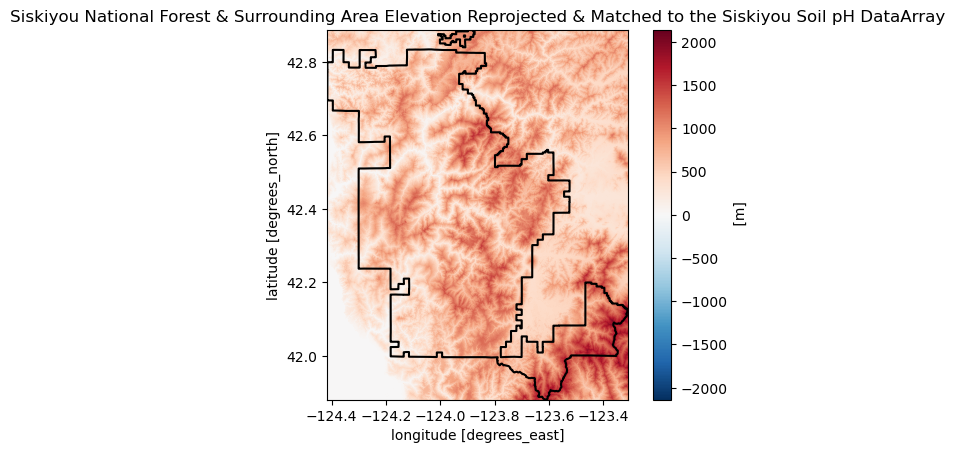

In [36]:
# Reproject and match siskiyou_srtm_da to the siskiyou_soil_ph_da
siskiyou_elev_matched_da = (siskiyou_srtm_da
                              .rio.reproject_match(siskiyou_soil_ph_da))
siskiyou_elev_matched_da.plot()

# Plot Siskiyou National Forest boundary on siskiyou_elev_matched_da plot
siskiyou_forest_gdf.boundary.plot(ax = plt.gca(), color='black')

plt.title('Siskiyou National Forest & Surrounding Area Elevation Reprojected & '
          'Matched to the Siskiyou Soil pH DataArray')
plt.show()

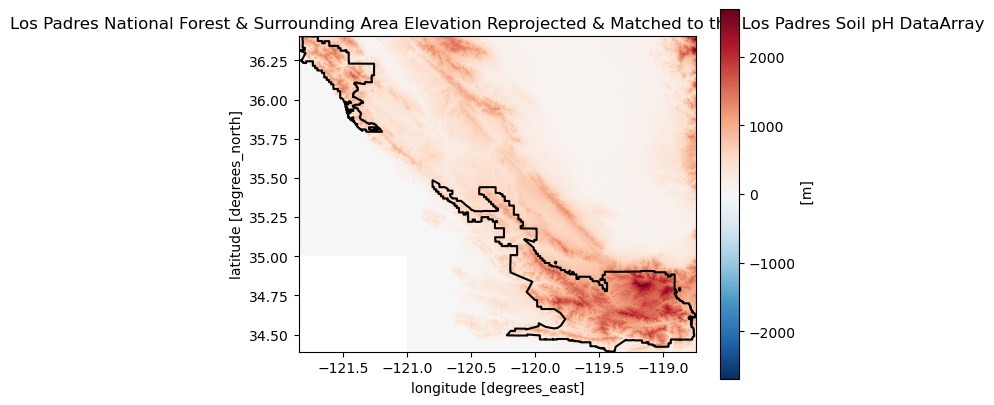

In [37]:
# Reproject and match padres_srtm_da to the padres_soil_ph_da
padres_elev_matched_da = (padres_srtm_da
                              .rio.reproject_match(padres_soil_ph_da))
padres_elev_matched_da.plot()

# Plot Los Padres National Forest boundary on padres_elev_matched_da plot
padres_forest_gdf.boundary.plot(ax = plt.gca(), color='black')

plt.title('Los Padres National Forest & Surrounding Area Elevation Reprojected & '
          'Matched to the Los Padres Soil pH DataArray')
plt.show()

<span style='color:purple'>

### Reproject MACA Climate DataArrays to the soil pH DataArrays

MACA Climate DataArrays are in this list: ave_annual_pr_das_list
There are 16 DataArrays in the list
Each needs to be reprojected -> loop

problem: above, I reprojected the SRTM DataArrays to the soil DataArrays based on the specific soil DataArray for the specific site. if I want to loop through the ave_annual_pr_das_list, that list contains DataArrays for both sites together.

    * possible solutions:
        * split ave_annual_pr_das_list into siskiyou and padres lists.
        * could I use a conditional to loop based on the name of the DataArray so that siskiyou ave_annual_pr_das reproject to siskiyou soil and padres ave_annual_pr_das reproject to padres soil?
        * do I have to reproject to the site specific soil DataArrays? - I think so b/c it looks like reproject_match not only matches the CRS but also the bounds

</span>

In [ ]:
# can I use the conditional above to identify the names of the DataArrays in the ave_annual_pr_das_list and then do something w/ the DataArray? YES

# empty list for reprojected DataArrays
reproj_ave_annual_pr_das = []

# for each DataArray in the ave_annual_pr_das_list,
for da in ave_annual_pr_das_list:
    # if 'Siskiyou' is in the name of the DataArray
    if 'Siskiyou' in da.name:
        # reproject and match the DataArray to the siskiyou_soil_ph_da
        reproj_da = (da.rio.reproject_match(siskiyou_soil_ph_da))
        # add reproj_da to the reproj_ave_annual_pr_das list
        reproj_ave_annual_pr_das.append(reproj_da)
    # otherwise print 'not a Siskiyou DataArray'
    else:
        print('not a Siskiyou DataArray')

# check reproj_ave_annual_pr_das list
# should have 8 reprojected Siskiyou DataArrays
reproj_ave_annual_pr_das

not a Siskiyou DataArray
not a Siskiyou DataArray
not a Siskiyou DataArray
not a Siskiyou DataArray
not a Siskiyou DataArray
not a Siskiyou DataArray
not a Siskiyou DataArray
not a Siskiyou DataArray


[<xarray.DataArray 'Siskiyou Average Annual Precipitation (mm), 2036-2065, CanESM2' (
                                                                                     y: 3622,
                                                                                     x: 3989)> Size: 58MB
 array([[2563.2915 , 2563.2915 , 2563.2915 , ...,  972.03076,  972.03076,
          972.03076],
        [2563.2915 , 2563.2915 , 2563.2915 , ...,  972.03076,  972.03076,
          972.03076],
        [2563.2915 , 2563.2915 , 2563.2915 , ...,  972.03076,  972.03076,
          972.03076],
        ...,
        [   0.     ,    0.     ,    0.     , ..., 1964.2653 , 1964.2653 ,
         1964.2653 ],
        [   0.     ,    0.     ,    0.     , ..., 1964.2653 , 1964.2653 ,
         1964.2653 ],
        [   0.     ,    0.     ,    0.     , ..., 1964.2653 , 1964.2653 ,
         1964.2653 ]], dtype=float32)
 Coordinates:
     crs          int64 8B 0
     spatial_ref  int64 8B 0
   * x            (x) float64 32kB -1

In [ ]:
# reproject and match padres climate DataArrays

# for each DataArray in the ave_annual_pr_das_list,
for da in ave_annual_pr_das_list:
    # if 'Padres' is in the name of the DataArray
    if 'Padres' in da.name:
        # reproject and match the DataArray to the padres_soil_ph_da
        reproj_da = (da.rio.reproject_match(padres_soil_ph_da))
        # add reproj_da to the reproj_ave_annual_pr_das list
        reproj_ave_annual_pr_das.append(reproj_da)
    # otherwise print 'not a Padres DataArray'
    else:
        print('not a Padres DataArray')

# check reproj_ave_annual_pr_das list
# should have 16 reprojected Siskiyou and Padres DataArrays
reproj_ave_annual_pr_das

not a Padres DataArray
not a Padres DataArray
not a Padres DataArray
not a Padres DataArray
not a Padres DataArray
not a Padres DataArray
not a Padres DataArray
not a Padres DataArray


[<xarray.DataArray 'Siskiyou Average Annual Precipitation (mm), 2036-2065, CanESM2' (
                                                                                     y: 3622,
                                                                                     x: 3989)> Size: 58MB
 array([[2563.2915 , 2563.2915 , 2563.2915 , ...,  972.03076,  972.03076,
          972.03076],
        [2563.2915 , 2563.2915 , 2563.2915 , ...,  972.03076,  972.03076,
          972.03076],
        [2563.2915 , 2563.2915 , 2563.2915 , ...,  972.03076,  972.03076,
          972.03076],
        ...,
        [   0.     ,    0.     ,    0.     , ..., 1964.2653 , 1964.2653 ,
         1964.2653 ],
        [   0.     ,    0.     ,    0.     , ..., 1964.2653 , 1964.2653 ,
         1964.2653 ],
        [   0.     ,    0.     ,    0.     , ..., 1964.2653 , 1964.2653 ,
         1964.2653 ]], dtype=float32)
 Coordinates:
     crs          int64 8B 0
     spatial_ref  int64 8B 0
   * x            (x) float64 32kB -1

In [29]:
len(reproj_ave_annual_pr_das)

16

check bounds of reprojected DataArrays to see if they match:

In [40]:
print(padres_soil_ph_da.rio.bounds())
print(padres_elev_matched_da.rio.bounds())
print(reproj_ave_annual_pr_das[8].rio.bounds())

(-121.8491666666681, 34.39138888891351, -118.74250000003074, 36.404166666672296)
(-121.8491666666681, 34.39138888891351, -118.74250000003074, 36.404166666672296)
(-121.8491666666681, 34.39138888891351, -118.74250000003074, 36.404166666672296)


In [ ]:
# Reproject and match siskiyou_srtm_da to the siskiyou_soil_ph_da
siskiyou_elev_matched_da = (siskiyou_srtm_da
                              .rio.reproject_match(siskiyou_soil_ph_da))
siskiyou_elev_matched_da.plot()

# Plot Siskiyou National Forest boundary on siskiyou_elev_matched_da plot
siskiyou_forest_gdf.boundary.plot(ax = plt.gca(), color='black')

plt.title('Siskiyou National Forest & Surrounding Area Elevation Reprojected & '
          'Matched to the Siskiyou Soil pH DataArray')
plt.show()